## tensorflow 实现线性回归的随机梯度下降

传统的梯度下降法在每一步迭代中计算梯度时都需要用到全部数据，因此也称为 batch gradient descent。当数据集非常大时，每一步的计算代价就会很大。随机梯度下降（stochastic gradient descent, 简称 SGD) 则是这种方法的一种随机近似（stochastic approximation)，每一步仅随机选取一条数据来计算梯度，减少了计算量。试验表明，随机梯度下降法的效率更高。

环境：docker 镜像 `tensorflow/tensorflow:latest-py3 (Python 3.4.3)`

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

### 生成训练数据

可以预先把数据集顺序打乱

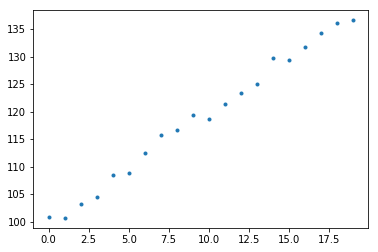

In [2]:
size = 20
x_train = np.arange(size, dtype=float)
np.random.shuffle(x_train)  # 打乱顺序（更严格的方式是每一遍分别打乱）
y_train = 100.0 + 2.0 * x_train + np.random.normal(scale=1, size=size)
plt.plot(x_train, y_train, '.');

### 定义模型和损失函数

In [3]:
w = tf.Variable([0.], tf.float32)  # 神经网络初始化必须用随机数
b = tf.Variable([0.], tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
y_bar = w * x + b
cost = tf.reduce_mean(tf.square(y_bar - y))

### 训练

In [4]:
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(500):
    for j in range(size):
        sess.run(train, {x:x_train[j], y:y_train[j]})
sess.run([w, b])

[array([ 2.03386354], dtype=float32), array([ 99.41652679], dtype=float32)]